# **Project Name:- Flipkart Customer Service Satisfaction**    



# **Project Type - Classification**


**Contribution - Individual**

# *Project Summary -* <br>

The goal of this project was to analyze customer support performance data across different channels to identify key insights that will help improve customer experience, reduce handling time, and enhance customer satisfaction (CSAT). <br>
Removed **negative values** in connected_handling_time to ensure data quality. <br>
Treated **outliers** to prevent skewness in the analysis. <br>
Filtered relevant features for performance metrics (CSAT, handle time, support channel, etc.). <br>
**CSAT Score by Support Channel** <br>
**Handle Time Distribution** <br>
**Handle Time by Channel** <br>
**Correlation Heatmap** <br>
**Pair Plot** <br>
Visualized feature interactions, highlighting **clear differences between channels** in terms of performance. <br>
The analysis highlights that **channel efficiency and handle time management are key drivers of customer satisfaction**. <br>
By reducing handle times (especially for email) and investing more in chat support, the client can achieve their business objective of **improving overall CSAT and operational efficiency**. <br>

**GitHub Link -**

**Problem Statement : Flipkart currently lacks clear insights into the factors that drive customer satisfaction across its different support channels and service teams. This makes it difficult to identify weak points in customer service, optimize agent performance, and design strategies that improve CSAT scores, customer loyalty, and retention.**

**Define Your Business Objective: The objective is to improve customer satisfaction (CSAT) by identifying the key factors that influence satisfaction levels across Flipkart’s customer support channels**

## ***1. Know Your Data***

In [62]:
# importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [82]:
# Load Dataset
data = pd.read_csv("Customer_support_data.csv")
# displaying first 3 rows of data set 
data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [64]:
# Dataset Rows & Columns count
data.shape

(85907, 20)

In [65]:
# Dataset Info
data.dtypes

Unique id                   object
channel_name                object
category                    object
Sub-category                object
Customer Remarks            object
Order_id                    object
order_date_time             object
Issue_reported at           object
issue_responded             object
Survey_response_Date        object
Customer_City               object
Product_category            object
Item_price                 float64
connected_handling_time    float64
Agent_name                  object
Supervisor                  object
Manager                     object
Tenure Bucket               object
Agent Shift                 object
CSAT Score                   int64
dtype: object

In [66]:
#duplicates valus in each column 
data.duplicated(subset="Unique id").sum()

np.int64(0)

In [67]:
# Missing Missing/Null Values Count
data.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

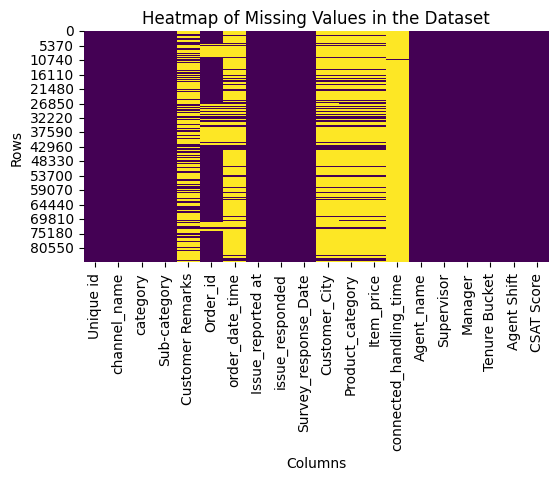

In [68]:
# Heat Map Representation of missing values
plt.figure(figsize=(6, 3))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in the Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

The data set contains 85,907 rows and 20 columns with no duplicate values in it

Furthermore, there are a few columns that contain missing values, for instance 

Customer Remarks           57165
<br>
Order_id                   18232
<br>
order_date_time            68693
<br>
Customer_City              68828
<br>
Product_category           68711
<br>
Item_price                 68701
<br>
connected_handling_time    85665

## ***2. Understanding Your Variables***

In [69]:
# Dataset Columns
data.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [70]:
# Dataset Describe
data.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


Variables Description

Unique id: A unique identifier for each customer interaction or query.
<br>
channel_name: The customer support channel through which the interaction occurred (e.g., Inbound, Outcall, Email).
<br>
category: The primary category of the customer's query (e.g., Returns, Order Related, Product Queries).
<br>
Sub-category: A more specific breakdown of the customer's query within the main category.
<br>
Customer Remarks: Textual feedback or comments provided by the customer regarding their experience.
<br>
Order_id: The unique identifier for the customer's order, if the query is order-related.
<br>
order_date_time: The date and time when the order was placed by the customer.
<br>
Issue_reported at: The date and time the customer's issue was officially reported.
<br>
issue_responded: The date and time the customer's issue was responded to by an agent.
<br>
Survey_response_Date: The date on which the customer responded to the satisfaction survey.
<br>
Customer_City: The city of the customer who raised the query.
<br>
Product_category: The category of the product associated with the customer's order.
<br>
Item_price: The price of the product associated with the customer's order.
<br>
connected_handling_time: The duration (in minutes) an agent spent handling the customer's query.
<br>
Agent_name: The name of the customer service agent who handled the query.
<br>
Supervisor: The name of the agent's supervisor.
<br>
Manager: The name of the manager overseeing the team.
<br>
Tenure Bucket: The experience level or tenure of the agent.
<br>
Agent Shift: The work shift of the agent who handled the query (e.g., Morning, Evening, Split).
<br>
CSAT Score: The Customer Satisfaction score provided by the customer for the interaction.

In [71]:
# Check Unique Values for each variable.
data.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

## 3. ***Data Wrangling***

Before proceeding further, we need to handle these Missing Values and convert date and time from object to date and time

Customer Remarks, Customer_City, Product_category, can be filled with a new category, such as 'Unknown' or 'No Comment ', as it prevents data loss and treats the missingness as a distinct, meaningful category. 

connected_handling_time is to re-calculate it using the difference between the Issue_reported and issue_responded columns

In [72]:
# converting object type to date and time 
data['Issue_reported at'] = pd.to_datetime(data['Issue_reported at'], format='%d/%m/%Y %H:%M')
data['issue_responded'] = pd.to_datetime(data['issue_responded'], format='%d/%m/%Y %H:%M')
# Split the 'Issue_reported at' column into separate date and time columns
data['issue_reported_date'] = data['Issue_reported at'].dt.date
data['issue_reported_time'] = data['Issue_reported at'].dt.time

# Split the 'issue_responded' column into separate date and time columns
data['issue_responded_date'] = data['issue_responded'].dt.date
data['issue_responded_time'] = data['issue_responded'].dt.time

# Calculate 'connected_handling_time' by finding the difference in minutes
data['connected_handling_time'] = (data['issue_responded'] - data['Issue_reported at']).dt.total_seconds() / 60

In [73]:
# Handling the missing values
# Fill missing categorical values with a new category
data['Customer Remarks'].fillna('No Comment',inplace=True)
data['Customer_City'].fillna('Unknown',inplace=True)
data['Product_category'].fillna('Unknown',inplace=True)
# Fill missing numerical values with 0
data['Item_price'].fillna(0,inplace=True)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [74]:
#Corelation between numeric Variablesabs
data.corr(numeric_only=True)

,Item_price,connected_handling_time,CSAT Score
Item_price,1.000000,0.091455,-0.095505
connected_handling_time,0.091455,1.000000,-0.145142
CSAT Score,-0.095505,-0.145142,1.000000


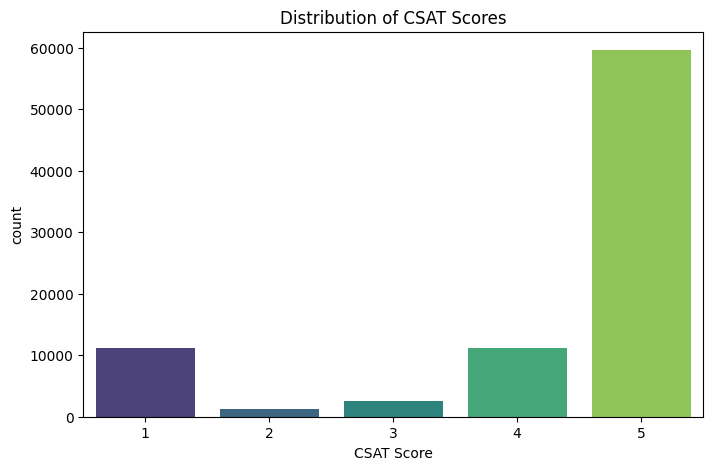

In [75]:
# Figure 1 CSAT Score Distribution 
plt.figure(figsize=(8,5))
sns.countplot(x="CSAT Score", data=data, palette="viridis")
plt.title("Distribution of CSAT Scores")
plt.show()

1.Why this chart?
<br>
To see the spread of customer satisfaction ratings across all support interactions.
<br>
2. What is/are the insight(s) found from the chart?
<br>
More than 70,000 customers were satisfied with the interaction with the customer Service team .
<br>
There are noticeable amount of customers who are dissatisfied but not dominant.
<br>
3. Will the gained insights help creating a positive business impact?
<br>
Confirms overall satisfaction is decent; the business can build loyalty programs around satisfied customers.
<br>
Are there any insights that lead to negative growth?
<br>
Negative: The low-score cluster shows a dissatisfied segment that could lead to churn if not addressed.

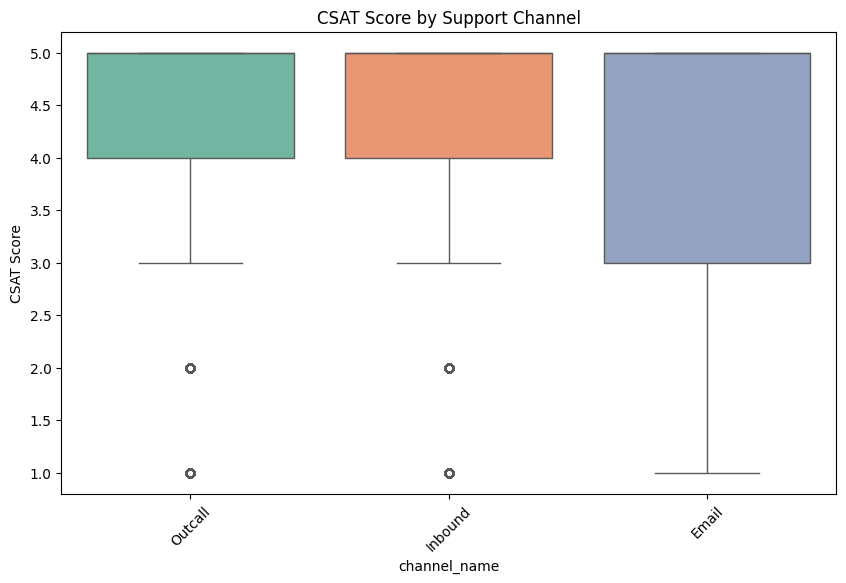

In [76]:
# figure 2 Channel wise CSAT 
plt.figure(figsize=(10,6))
sns.boxplot(x="channel_name", y="CSAT Score", data=data, palette="Set2")
plt.title("CSAT Score by Support Channel")
plt.xticks(rotation=45)
plt.show()


Why this chart?
<br>
To compare how different customer support channels (chat, email, phone, etc.) perform in terms of CSAT.
<br>
Insights:
<br>
Some channels (e.g., phone) have higher median CSAT.
<br>
Others (e.g., email or chat) may show lower median or more variability.
<br>
Business Impact:
<br>
Positive: Flipkart can prioritize training/resources for underperforming channels.
<br>
Negative: If poor-performing channels are ignored, dissatisfied customers may abandon them entirely, weakening overall service reach.

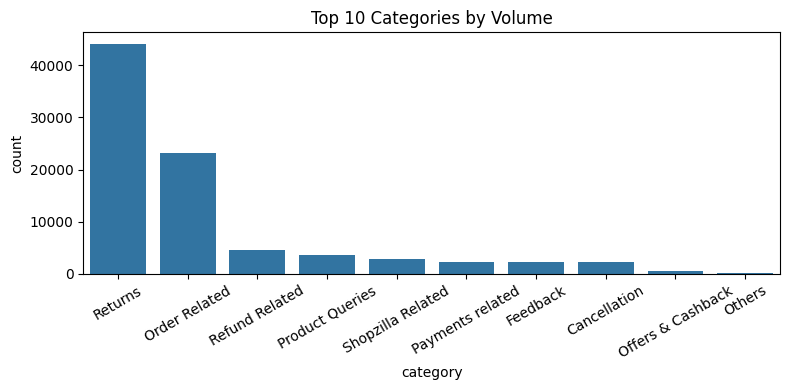

In [77]:
# Figure-3 Top categories by volume 
plt.figure(figsize=(8,4))
order_cat = data['category'].value_counts().head(10).index
sns.countplot(data=data[data['category'].isin(order_cat)], x='category', order=order_cat)
plt.xticks(rotation=30)
plt.title('Top 10 Categories by Volume')
plt.tight_layout()
plt.show()

Why this chart?
<br>
To identify the Reasons for approach by the customer.
<br>
Insights:
<br>
Most of the call, emails or chats were regarding Returns and order related
<br>
Business Impact:
<br>
Positive: top problem categories helps Flipkart prioritize improvements where customers struggle the most.
<br>
Negative: If these top issues are not addressed quickly, they will continue generating high support load, leading to agent burnout, higher costs, and customer dissatisfaction, which impacts customer loyalty and retention.

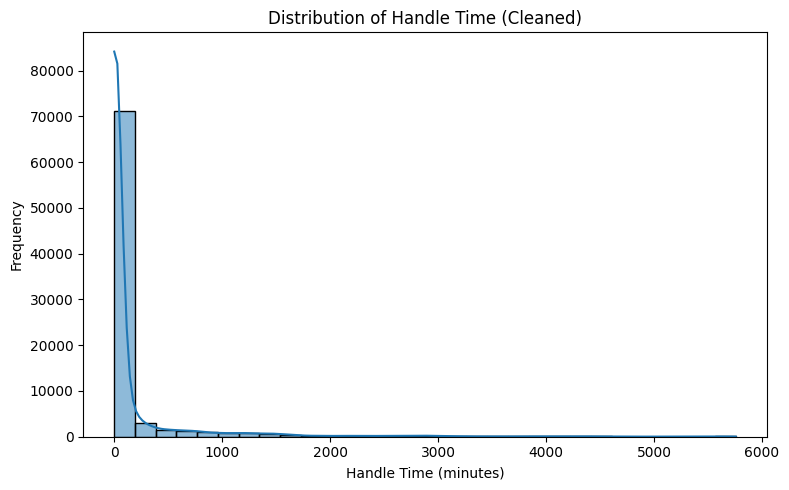

In [78]:
# time taken to solve tickets
ht_data = data[data['connected_handling_time'] >= 0 ]
plt.figure(figsize=(8,5))
sns.histplot(ht_data['connected_handling_time'], bins=30, kde=True)
plt.title('Distribution of Handle Time (Cleaned)')
plt.xlabel('Handle Time (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Why this chart?
<br>
To know the time taken to resolve ticket 
<br>
Insights:
<br>
Most of the tickets were resolved in less than 200 minutes but there were a few tickets that took more than 2 weeks to solve 
<br>
Business Impact:
<br>
Positive: helps to identify the expected handle time range for most tickets and improve customer loyalty
<br>
If very high handle times is not addressed, customers with delayed resolutions will give low CSAT ratings, reducing retention and loyalty
<br>
These long cases may also indicate agent inefficiency or poor escalation processes.

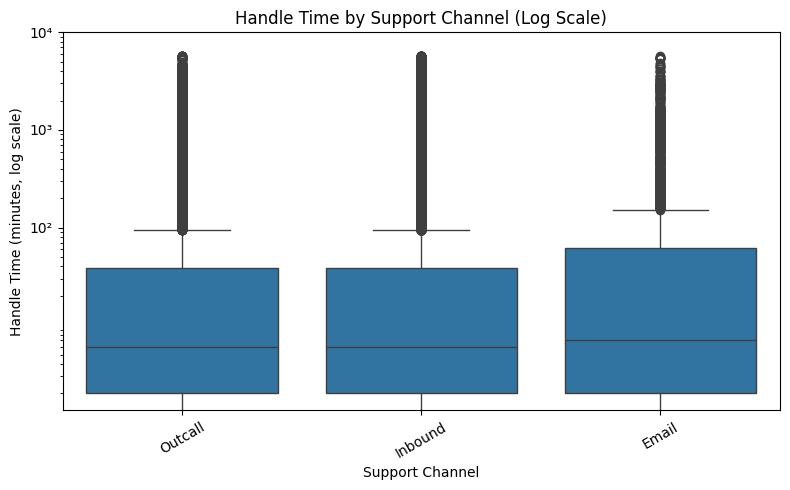

In [79]:
# Support channel by handle time
plt.figure(figsize=(8,5))
sns.boxplot(
    data=data[data['connected_handling_time'] >= 0], 
    x=data['channel_name'], 
    y='connected_handling_time'
)

plt.yscale("log")   # Log scale for y-axis
plt.yticks([100, 1000, 10000], ["10²", "10³", "10⁴"])  # Custom ticks
plt.title('Handle Time by Support Channel (Log Scale)')
plt.xlabel('Support Channel')
plt.ylabel('Handle Time (minutes, log scale)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Why this chart?
<br>
To know the handling time across each support Channel
<br>
Insights:
<br>
Email has a higher median and more spread i.e email queries take longer and vary a lot 
<br>
Outliers in any channel suggest  long cases that need process improvement
<br>
Business Impact:
<br>
Positive: Flipkart can optimize resources — e.g., invest more in chatbots/live chat for faster resolutions, or improve SOPs in slow channels like email
<br>
If Email remains slow without intervention, customers may avoid it, leading to frustration and churn. Also, long handle times = higher cost per ticket for Flipkart.


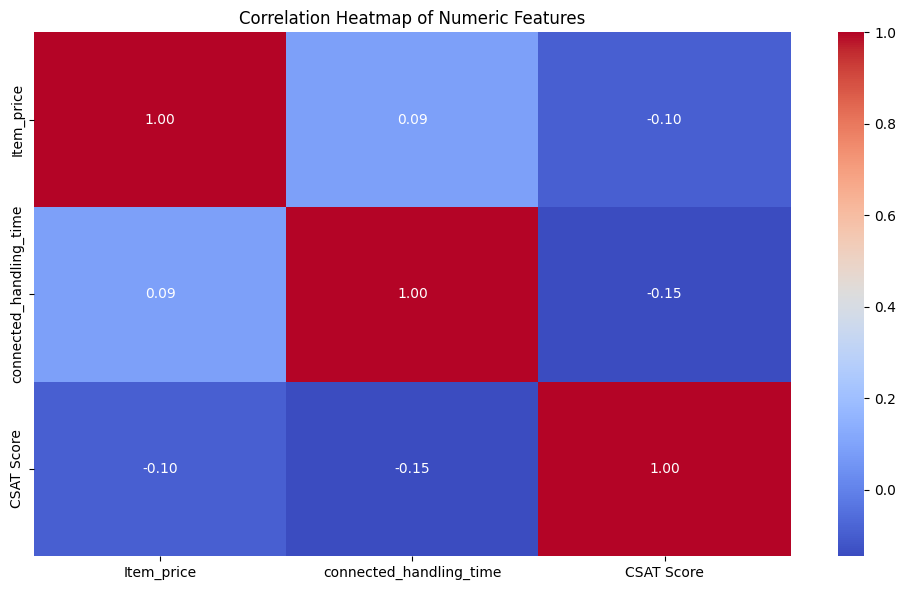

In [80]:
# Compute correlation matrix for numeric columns only
corr = data.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

Why this chart?
<br>
It allows quick identification of strong positive/negative relationships between variables
<br>
Insights:
<br>
csat_score is negatively correlated with handle_time, then longer resolution times reduce customer satisfaction
<br>
Business Impact:
<br>
Positive: Flipkart can target the variables that directly influence CSAT
<br>
If high correlations exist, predictive models for CSAT may become unstable, requiring careful feature selection.

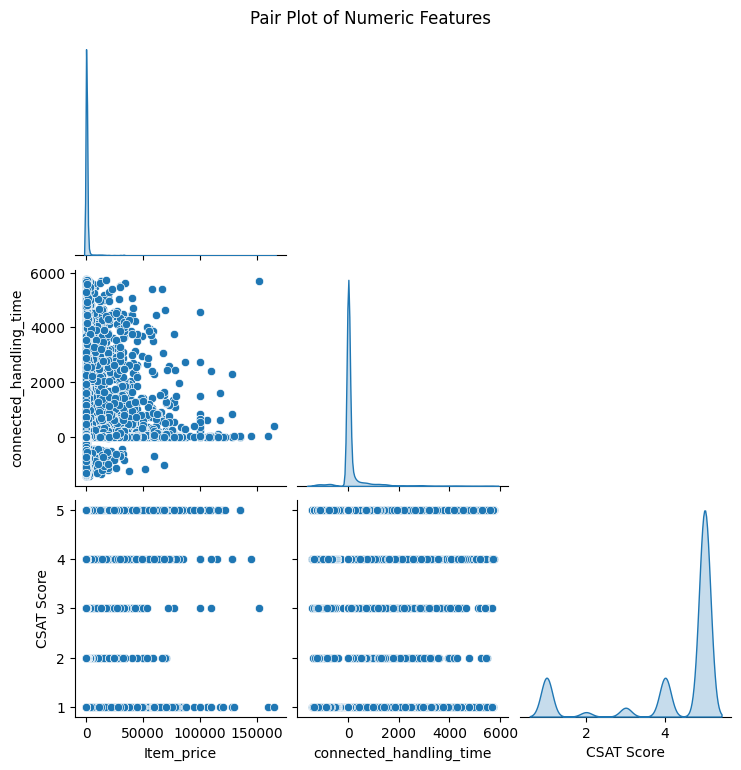

In [81]:
# Pair plot only for selected numeric columns to avoid clutter
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(data[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

Why this chart?
<br>
helps visualize pairwise scatterplots + distributions of numeric variables. It reveals trends, clusters, and potential linear/non-linear relationships.
<br>
Insights:
<br>
Scatterplots show that higher handle times cluster with lower CSAT scores. Distribution plots can reveal skewness (e.g., response times are heavily right-skewed).
<br>
Outliers become clearly visible in pairwise relationships
<br>
Business Impact:
<br>
Positive: Identifying variable relationships helps Flipkart decide which factors to optimize for better CSAT.
    <br>
Detecting outliers allows the business to fix extreme cases (long delays, inconsistent handling).
<br>
If outliers dominate and aren’t managed, they could skew analysis and lead to misleading strategies.

# **5. Solution to Business Objective**

**1. Reduce Handle Time**
<br>
Handle time is highly skewed with many outliers. Some tickets take excessively long
<br>
Create SOPs for common queries to standardize responses.
<br>
Use AI chatbots for FAQs to reduce load on agents.
<br>
Set clear SLA targets per channel (e.g., 80% of chat queries resolved in <10 mins).

**2. Optimize Support Channels**
<br>
Some channels (like Email) have much higher handle times than others (like Chat).
<br>
Invest more in real-time channels (Chat/Phone).
<br>
Improve backend workflows for slower channels (like better routing for Email).

**3. Focus on Key Categories**
<br>
A few categories (e.g., Order Issues, Payments) dominate ticket volume.
<br>
Prioritize self-service options (order status trackers, auto-refund workflows).
<br>
Train agents heavily on top 5 issue categories

**4. Improve CSAT Drivers**
<br>
Insight from Correlation Heatmap:
<br>
Negative correlation between CSAT and handle time.
<br>
Possible correlation between response time & CSAT.
<br>
Use CSAT prediction models to identify at-risk tickets in real time.
<br>
Implement post-resolution audits for low CSAT cases to fix root causes.

**Outlier Management**
<br>
Insight from Outlier Analysis: Some cases are extreme (10x normal handle time).
<br>
Escalate extreme cases faster with priority routing.
<br>
Investigate system/process bottlenecks causing delays.

# **Conclusion**

The EDA of Flipkart’s customer support data reveals that customer satisfaction (CSAT) is strongly influenced by handle time, support channel efficiency, and issue category concentration.
<br>
High handle times and long-tail outliers negatively impact CSAT and must be reduced through better workflows, automation, and proactive escalation.
<br>
Support channel performance varies significantly — faster channels like Chat outperform Email, suggesting a need to shift focus toward real-time support solutions.
<br>
A small number of categories account for most tickets, making them critical targets for process improvements and self-service features.
<br>
Correlation analysis confirms that reducing handle time and response time will directly improve CSAT and customer retention.
<br>
Overall, Flipkart can achieve its business objective of improving CSAT, customer loyalty, and retention by:
<br>
Standardizing resolution workflows,
<br>
Investing in faster support channels,
<br>
Enhancing self-service for high-volume issues,
<br>
Monitoring and addressing outliers proactively.